# 2.3: Nonlinear parameter estimation: Iterative Earthquake location#

*Andrew Valentine & Malcolm Sambridge - Research School of Earth Sciences, The Australian National University - Last updated Sept. 2019*

<!--<badge>--><a href="https://colab.research.google.com/github/anu-ilab/JupyterPracticals/blob/main/S2.3 - Iterative Earthquake location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In this practical, we will look at a nonlinear inverse problem that requires an iterative solution. 

As an example, we will consider is earthquake location.

Specifically, the practical is to write a python script to iteratively update an earthquake location for the $(x,y,z)$ and origin time, $t$.  Use a homogeneous crustal Earth model with wave speed, v=5.4 km/s. The tasks to be performed are:

1. Read in 10 seismic stations at locations on a +-30km box in (x,y) at the earth’s surface together with two sets of arrival times from the source to each station, one with noise added and one without.

2. Choose a random starting guess inside the box and determine expressions for each entry of the 10 x 4 Derivative matrix and build the G matrix. Build the data covariance matrix for independent Gaussian errors with $\sigma=0.2$

3. Apply the least squares iterative solution to both the noisy and noiseless data sets. Decide how many iterations to let it run for.

4. Make a plot showing the source location at each iteration for each case.

5. Make a table of the residuals vs iteration for each case.

6. Calculate and plot the model covariance matrices for each pair of parameters at your final solution.

Things to consider. Does the iterative algorithm converge to a good enough solution? Does this solution fit teh data adequately? How many iterations does it take? What happens if you put the starting solution far from the actual earthquake location? 

In [6]:
# -------------------------------------------------------- #
#                                                          #
#     Uncomment below to set up environment on "colab"     #
#                                                          #
# -------------------------------------------------------- #

# !pip install -U anu-inversion-course
# !git clone https://github.com/anu-ilab/JupyterPracticals
# %cd JupyterPracticals

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from anu_inversion_course import plotcovellipse as pc
import pickle

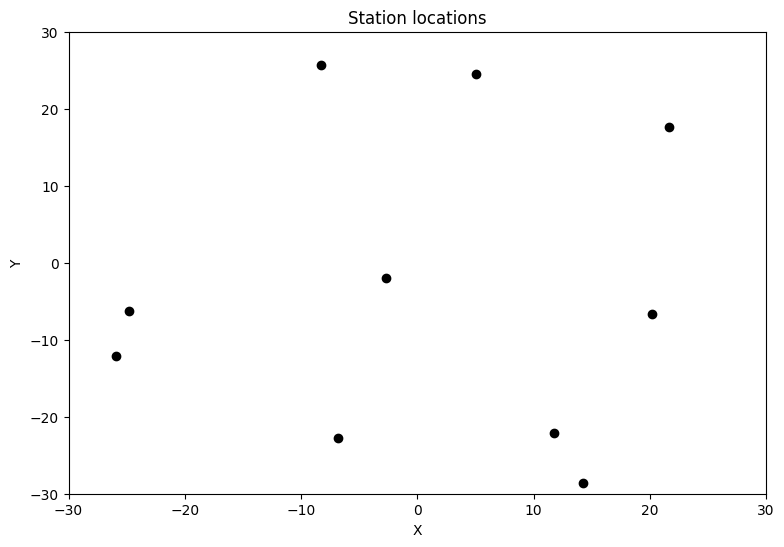

 tobs
 [ 9.31979913 10.67036112  7.91562913 11.80824099 11.13594735  9.50326285
 10.56990629 12.26874052  9.99586708  8.01971903]
 tobsn
 [ 9.14788778 10.69212619  7.90166076 11.8822169  11.07486658  9.60494135
 10.17896718 12.28384527 10.04709788  8.04154611]


In [8]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# Read in 10 seismic stations at random locations on a +-30km box in (x,y) at the earth’s surface together 
# with two sets of arrival times from the source to each station, one with noise added and one without.

pickle_off = open("Datasets/eqdata.pickle","rb")
[tobs,tobsn,sta] = pickle.load(pickle_off)

fig, ax = plt.subplots(figsize=(9,6))
plt.title('Station locations')
ax.scatter(sta.T[0],sta.T[1],color='k')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(' tobs\n',tobs)
print(' tobsn\n',tobsn)

Cdinv = np.eye(len(tobs))/(0.2*0.2) # data covariance matrix for independent noise in the arrival times.


**Task 1** First write a python function to calculate the arrival times of seismic phases at all stations.

A typical structure might be
```python
    def calct(sol,sta):
        .
        .
        .
    return tpred
```
where the inputs `sol[0,..,3]` is the input trial earthquake location $(x,y,z,t_0)$; `sta[i,0,..2]` is the 
$(x,y,z)$ location of the ith station. And the outputs are `tpred(i)` the arrival time at the ith station from teh input location.

In [9]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 2** Now write a function to calculate the G matrix of seismic phases at all stations for any trial earthquake location.

A typical structure might be
```python
    def calcG(sol,sta):
        .
        .
        .
    return G
```
where $G$ is the matrix where each row is the partial derivative of the arrival time at the $i$ station with respect to the four location parameters $(x,y,z,t)$. It will be imporatnt to keep the order of the model unknowns consistent between routines. 

In [10]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 3** Now iteratively solve the least squares problem starting at your initial guess location and print out convergence of the solution (or divergence!). You have to choose the number of iterations. Try this for the noise free arrival times `tobs` and then the noisy arrival times `tobsn`. Can you explain the difference in the solutions?

In [11]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 4** Make a plot of the convergence of the solution in the (x,y) plane, e.g. by colouring the start position in green and the final position in red with intermnediate epicentres as open circles.

Note: You could experiment this using different starting positions and see when the iterations diverge. Can you find a starting location for which the iterations diverge? Why do you think it diverges for this choice?

In [12]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 5** For a case where it converges, make a table of arrival time residuals for each iteration.

In [13]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 6** Perform a goodness of fit test to see if the data fit is satisfactory. Calculate the 5%, 50%, and 95% critical values and the p value for the best fit.

In [14]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 7** Calculate and plot the model covariance matrices for each pair of parameters at your final solution in the (x,y),(x,z),(y,z) and (z,t) planes. Do you see any significant trade-offs between the errors here?

In [15]:
### Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



----